In [212]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

In [213]:
measles_raw_data = pd.read_csv("measles - measles.csv")
measles_raw_data.head()
measles_raw_data.groupby("year").count()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,state,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
year,,,,,,,,,,,,,,,
2017,1939,1939,1939,0,1939,0,0,1939,1939,1939,0,0,0,1939,1939
2017-18,10418,10418,10418,7183,6060,10390,0,4970,10418,10418,9,1829,2698,10410,10410
2018-19,48075,48075,48075,22308,34573,43788,0,40900,48075,48075,84,17723,4483,46539,46539


In [214]:
measles_clean = measles_raw_data.drop(columns=["xper", "xmed", "xrel", "district", "year", "county", "enroll"])
# measles_clean = measles_clean.dropna()

# measles_clean.dtypes

In [215]:
# neg_count = measles_clean.loc[["mmr" == "-1"]]
# len(neg_count)

measles_clean['mmr'].value_counts()
measles_clean['overall'].value_counts()

-1.000000      27224
 98.000000      5191
 100.000000     3619
 95.000000      3051
 99.000000      1764
               ...  
 90.140845         1
 96.020000         1
 43.640000         1
 98.098859         1
 90.052356         1
Name: overall, Length: 2691, dtype: int64

In [216]:
measles_clean = measles_clean.loc[measles_clean["mmr"] >= 0]
measles_clean = measles_clean.loc[measles_clean["overall"] >= 0]
# measles_clean

In [217]:
measles_clean["type"].fillna("Other", inplace = True)
measles_clean

,index,state,name,type,city,mmr,overall,lat,lng
2018,1,California,Abby Reinke Elementary,Public,Temecula,99.00,96.00,33.492008,-117.087291
2019,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.741155,-117.902009
2020,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.077328,-117.317020
2021,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,34.227892,-118.252604
2022,2,California,Abraham Lincoln Elementary,Public,Santa Ana,99.00,99.00,33.734440,-116.373073
...,...,...,...,...,...,...,...,...,...
63242,1364,Washington,Overcomer Academy,Other,Auburn,23.53,17.65,47.301117,-122.276320
63243,1365,Washington,Salvation Christian Academy- Formerly Slavic C...,Other,Edgewood,22.22,22.22,47.249023,-122.287615
63244,1366,Washington,Saratoga,Other,Stanwood,20.00,20.00,48.242579,-122.359097
63245,1367,Washington,Skagit Family Learning Center,Other,Mount Vernon,17.65,11.76,48.406426,-122.339166


In [218]:
measles_clean.groupby("type").count()

,index,state,name,city,mmr,overall,lat,lng
type,,,,,,,,
Kindergarten,1484,1484,1484,0,1484,1484,1484,1484
Other,3122,3122,3122,1978,3122,3122,3121,3121
Private,2258,2258,2258,2237,2258,2258,2207,2207
Public,14904,14904,14904,14904,14904,14904,14895,14895


In [219]:
# Melissa's code starts here

In [220]:
# Set up Public, Private, Kindergarten, and Other dataframes

public_stats = measles_clean.loc[measles_clean["type"] == "Public"]
# public_stats

private_stats = measles_clean.loc[measles_clean["type"] == "Private"]
# private_stats

kindergarten_stats = measles_clean.loc[measles_clean["type"] == "Kindergarten"]
# kindergarten_stats

other_stats = measles_clean.loc[measles_clean["type"] == "Other"]
# other_stats

colorado = measles_clean.loc[measles_clean["state"] == "Colorado"]
colorado.groupby("type").count()

,index,state,name,city,mmr,overall,lat,lng
type,,,,,,,,
Kindergarten,1484,1484,1484,0,1484,1484,1484,1484
Private,21,21,21,0,21,21,21,21


In [221]:
# Loop through the data frame to calculate stats by state

# Set up empty lists to fill in for loop
states = measles_clean["state"].unique()
# states
count_states = []
mean_mmr = []
median_mmr = []
public_mean = []
public_median = []
private_mean = []
private_median = []
kind_mean = []
kind_median = []
other_mean = []
other_median = []

for state in states:
    
    # Identify what state to work with
    state_active = measles_clean.loc[measles_clean["state"] == state]
    
    # Count all the schools for each state
    count_active = state_active["state"].count()
    count_states.append(count_active)
    
    # Calculate mean for each state
    mean_active = state_active["mmr"].mean()
    mean_mmr.append(mean_active)
    
    # Calculate median for each state
    median_active = state_active["mmr"].median()
    median_mmr.append(median_active)
    
    # Reset state_active for use on public subsets
    state_active = public_stats.loc[public_stats["state"] == state]
    
    # Calculate mean for public schools
    public_active = state_active["mmr"].mean()
    public_mean.append(public_active)
    
    # Calculate median for public schools
    public_active = state_active["mmr"].median()
    public_median.append(public_active)
    
    # Reset state_active for use on private subsets
    state_active = private_stats.loc[private_stats["state"] == state]
    
    # Calculate mean for private schools
    private_active = state_active["mmr"].mean()
    private_mean.append(private_active)
    
    # Calculate median for private schools
    private_active = state_active["mmr"].median()
    private_median.append(private_active)
    
    # Reset state_active for use on kindergarten subsets
    state_active = kindergarten_stats.loc[kindergarten_stats["state"] == state]
    
    # Calculate mean for kindergarten schools
    kind_active = state_active["mmr"].mean()
    kind_mean.append(kind_active)
    
    # Calculate median for kindergarten schools
    kind_active = state_active["mmr"].median()
    kind_median.append(kind_active)
    
    # Reset state_active for use on other subsets
    state_active = other_stats.loc[other_stats["state"] == state]
    
    # Calculate mean for Other schools
    other_active = state_active["mmr"].mean()
    other_mean.append(other_active)
    
    # Calculate median for Other schools
    other_active = state_active["mmr"].median()
    other_median.append(other_active)
   
       
other_median

[nan, nan, nan, 95.67723343, 97.22222222, 92.125]

In [222]:
# Get list of states to work with

# Set up summary table of averages per state
avg_by_state = pd.DataFrame({
    "State": states
})

avg_by_state["Count of Schools"] = count_states
avg_by_state["Overall  Mean"] = mean_mmr
avg_by_state["Overall Median"] = median_mmr
avg_by_state["Public Mean"] = public_mean
avg_by_state["Public Median"] = public_median
avg_by_state["Private Mean"] = private_mean
avg_by_state["Private Median"] = private_median
avg_by_state["Kindergarten Mean"] = kind_mean
avg_by_state["Kindergarten Median"] = kind_median
avg_by_state["Other Mean"] = other_mean
avg_by_state["Other Median"] = other_median

avg_by_state

# Investigate NaNs
# Indicate a lack of that school type reporting out of that state

,State,Count of Schools,Overall Mean,Overall Median,Public Mean,Public Median,Private Mean,Private Median,Kindergarten Mean,Kindergarten Median,Other Mean,Other Median
0,California,14224,96.371836,98.000000,96.644004,98.00,93.874821,95.0,NaN,NaN,NaN,NaN
1,Colorado,1505,94.210904,97.800000,NaN,NaN,95.121905,100.0,94.198012,97.8,NaN,NaN
2,Ohio,2917,91.463692,94.870000,91.284485,94.74,91.907545,95.0,NaN,NaN,NaN,NaN
3,Oregon,806,94.081152,95.677233,NaN,NaN,NaN,NaN,NaN,NaN,94.081152,95.677233
4,Vermont,338,94.583320,97.222222,NaN,NaN,NaN,NaN,NaN,NaN,94.583320,97.222222
5,Washington,1978,89.336830,92.125000,NaN,NaN,NaN,NaN,NaN,NaN,89.336830,92.125000


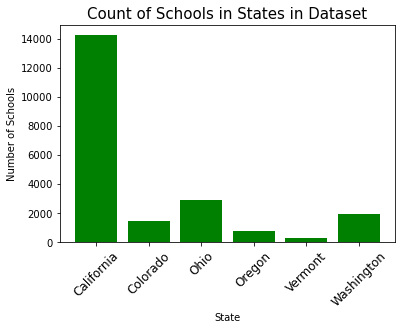

In [223]:
# Plot of school counts across states

y_axis = count_states
x_axis = np.arange(len(states))

plt.bar(x_axis, y_axis, color="green")
plt.ylabel("Number of Schools")
plt.xlabel("State")
plt.title("Count of Schools in States in Dataset", fontsize=15)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()
# Look at California alone

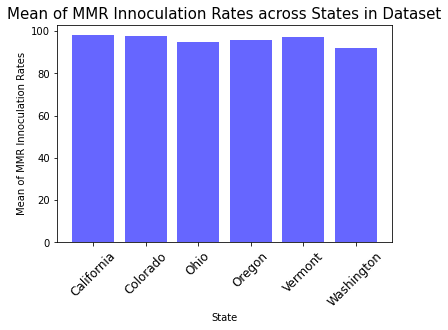

In [224]:
# Plot the data

y_axis = median_mmr
x_axis = np.arange(len(states))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="blue", alpha=0.6, align="center")

plt.ylabel("Mean of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean of MMR Innoculation Rates across States in Dataset", fontsize=15)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

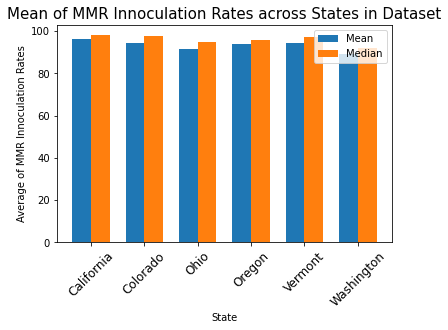

In [225]:
# Plot with grouped bars -- MEAN AND MEDIAN BY STATE
# https://matplotlib.org/3.3.4/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(states))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_mmr, width, label="Mean")
rects2 = ax.bar(x + width/2, median_mmr, width, label="Median")

plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean of MMR Innoculation Rates across States in Dataset", fontsize=15)
plt.legend()

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

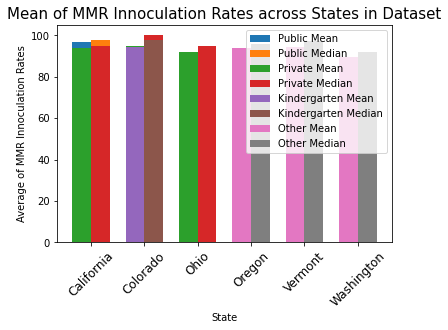

In [226]:
# Plot with grouped bars -- ALL DATA BY STATE
# https://matplotlib.org/3.3.4/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(states))  
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, public_mean, width, label="Public Mean")
rects2 = ax.bar(x + width/2, public_median, width, label="Public Median")
rects3 = ax.bar(x - width/2, private_mean, width, label="Private Mean")
rects4 = ax.bar(x + width/2, private_median, width, label="Private Median")
rects5 = ax.bar(x - width/2, kind_mean, width, label="Kindergarten Mean")
rects6 = ax.bar(x + width/2, kind_median, width, label="Kindergarten Median")
rects7 = ax.bar(x - width/2, other_mean, width, label="Other Mean")
rects8 = ax.bar(x + width/2, other_median, width, label="Other Median")

plt.ylabel("Average of MMR Innoculation Rates")
plt.xlabel("State")
plt.title("Mean of MMR Innoculation Rates across States in Dataset", fontsize=15)
plt.legend()

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation="45", fontsize=12)

plt.show()

# Oregon, Vermont, Washington should be assessed separately

In [227]:
avg_by_state

,State,Count of Schools,Overall Mean,Overall Median,Public Mean,Public Median,Private Mean,Private Median,Kindergarten Mean,Kindergarten Median,Other Mean,Other Median
0,California,14224,96.371836,98.000000,96.644004,98.00,93.874821,95.0,NaN,NaN,NaN,NaN
1,Colorado,1505,94.210904,97.800000,NaN,NaN,95.121905,100.0,94.198012,97.8,NaN,NaN
2,Ohio,2917,91.463692,94.870000,91.284485,94.74,91.907545,95.0,NaN,NaN,NaN,NaN
3,Oregon,806,94.081152,95.677233,NaN,NaN,NaN,NaN,NaN,NaN,94.081152,95.677233
4,Vermont,338,94.583320,97.222222,NaN,NaN,NaN,NaN,NaN,NaN,94.583320,97.222222
5,Washington,1978,89.336830,92.125000,NaN,NaN,NaN,NaN,NaN,NaN,89.336830,92.125000


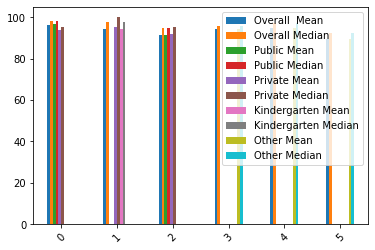

In [239]:
group_by_state = avg_by_state.drop(["Count of Schools"], axis=1)
state_group_fig = group_by_state.plot.bar(rot=45)

In [228]:
# Look at data in groups of states
# California only

california = avg_by_state.loc[avg_by_state["State"] == "California"]
california = california.drop(columns= ["State", "Count of Schools", 
                                      "Kindergarten Mean", "Kindergarten Median", 
                                      "Other Mean", "Other Median"])

cali_labels = california.columns
california = california.T
cali_data = california[0]
# cali_data

ohio = avg_by_state.loc[avg_by_state["State"] == "Ohio"]
ohio = ohio.drop(columns= ["State", "Count of Schools", 
                                      "Kindergarten Mean", "Kindergarten Median", 
                                      "Other Mean", "Other Median"])


ohio_labels = ohio.columns
ohio = ohio.T
ohio_data = ohio[2]
# ohio_data


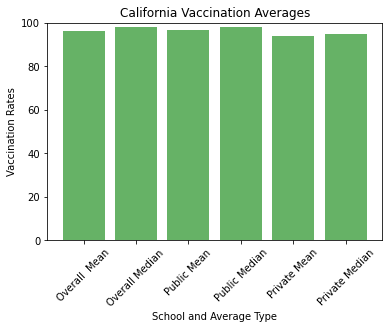

In [229]:
#California Only
# Plot the data

y_axis = cali_data
x_axis = np.arange(len(cali_labels))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="green", alpha=0.6, align="center")

# Formatting

plt.title("California Vaccination Averages")
plt.xlabel("School and Average Type")
plt.ylabel("Vaccination Rates")
plt.ylim(0, 100)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, cali_labels, rotation="45")

plt.show()

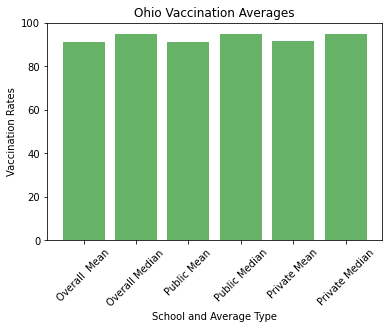

In [230]:
# Ohio only
# Plot the data

y_axis = ohio_data
x_axis = np.arange(len(ohio_labels))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="green", alpha=0.6, align="center")

# Formatting

plt.title("Ohio Vaccination Averages")
plt.xlabel("School and Average Type")
plt.ylabel("Vaccination Rates")
plt.ylim(0, 100)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ohio_labels, rotation="45")

plt.show()

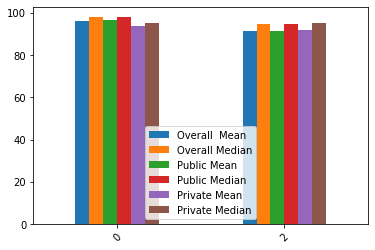

In [231]:
avg_by_state
cali_ohio = avg_by_state.loc[(avg_by_state["State"] == "California") | (avg_by_state["State"] == "Ohio")]
cali_ohio
cali_ohio = cali_ohio.drop(columns= ["Count of Schools", 
                                      "Kindergarten Mean", "Kindergarten Median", 
                                      "Other Mean", "Other Median"])
cali_ohio

cali_ohio_simple = pd.DataFrame({
    "California": cali_data,
    "Ohio": ohio_data
})
cali_ohio_simple

figure = cali_ohio.plot.bar(rot=45)

In [232]:
# # Trying to plot California and Ohio together

# cal_oh = ["California", "Ohio"]
# co_overall_mean = cali_ohio["Overall  Mean"]
# co_overall_median = cali_ohio["Overall Median"]
# co_public_mean = cali_ohio["Public Mean"]
# co_public_median = cali_ohio["Public Median"]
# co_private_mean = cali_ohio["Private Mean"]


# co_private_median = cali_ohio["Private Median"]


# x = np.arange(len(cal_oh))  
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/1, co_overall_mean, width, label="Overall Mean")
# rects2 = ax.bar(x + width/1, co_overall_median, width, label="Overall Median")
# rects3 = ax.bar(x - width/3, co_public_mean, width, label="Public Mean")
# rects4 = ax.bar(x + width/3, co_public_median, width, label="Public Median")
# rects5 = ax.bar(x - width/2, co_private_mean, width, label="Private Mean")
# rects6 = ax.bar(x + width/2, co_private_median, width, label="Private Median")


# plt.ylabel("Average of MMR Innoculation Rates")
# plt.xlabel("State")
# plt.title("Mean of MMR Innoculation Rates across California and Ohio", fontsize=15)
# plt.legend()

# # tick_locations = [value for value in cal_oh]
# # plt.xticks(tick_locations, cal_oh, rotation="45", fontsize=12)

# plt.show()

In [233]:
# This was research

# # measles_clean.loc[(measles_clean.type == "NaN"), "type"]="Other"
# # measles_clean["type"]=measles_clean["type"].replace({"NaN":"Other"})
# # measles_clean.loc[(measles_clean.type == 'NaN'),'type']='Other'
# # measles_clean.fillna(0)

# measles_clean["type"]=measles_clean["type"].fillna(0)
# measles_clean["type"] = measles_clean.type.astype(str)

# measles_clean.loc[(measles_clean.type == "0"), "type"]="Other"
# measles_clean